In [1]:
%matplotlib inline
from pylab import *
from IPython.html.widgets import interact
from IPython import display
from collections import deque

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from pid import PIDAgent
agent = PIDAgent()

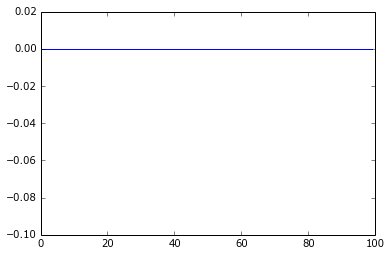

In [3]:
@interact(kp=(0, 100, 1), ki=(-1, 1, 0.1), kd=(-1, 1, 0.1), delay=(0, 5))
def set_pid_parameters(kp, ki, kd, delay=0):
    global agent
    agent.joint_controller.Kp = kp
    agent.joint_controller.Ki = ki
    agent.joint_controller.Kd = kd
    agent.joint_controller.set_delay(delay)

joint_name = 'HeadYaw'
sensor = deque(maxlen=100)
target = deque(maxlen=100)

@interact(name=agent.joint_names)
def set_joint_name(name):
    global joint_name
    if joint_name != name:
        joint_name = name
        sensor.clear()
        target.clear()

@interact(value=(-1, 1, 0.1))
def set_joint_target(value):
    agent.target_joints[joint_name] = value

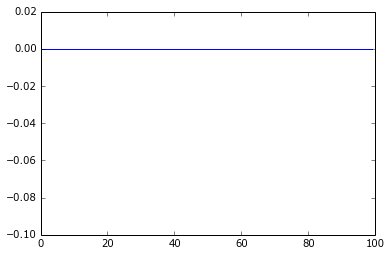

In [4]:
# inject plotting input agent's loop
cycle = 0
orig_sense_think_act = agent.sense_think_act
def sense_think_act():
    global cycle
    cycle += 1
    orig_sense_think_act()
    sensor.append(agent.perception.joint[joint_name])
    target.append(agent.target_joints[joint_name])
    if cycle % 10 == 0:  # plot every 10 cycles
        cla()
        plot(target, '-r')
        plot(sensor, '-b')
        display.clear_output(wait=True)
        display.display(gcf())
agent.sense_think_act = sense_think_act
agent.start()